# Analysis of unstructured data
### Lab 1
---
### Author: Jarosław Opała
---

The dataset used in the report was downloaded from https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset.

Data consist of information about players in **FIFA** game since 2015 until 2020. Only FIFA20 dataset was selected for analysis.

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import norm

In [2]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'large',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large'
}
pylab.rcParams.update(params)

# Data overview

Data import and first glance at

In [3]:
path_data = os.path.join(os.getcwd(), 'data/players.csv')
data_raw  = pd.read_csv(path_data)

In [4]:
data_raw.shape

(18278, 104)

In [5]:
# Number of variables exceeds maximum displayed columns. 
pd.options.display.max_columns = None
data_raw.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## Data cleaning

### Variable filtering

There is information about 18278 with 104 variables. Most of them are players' detailed statistics in the game, which won't be analysed. Let's filter them out.

In [6]:
data = data_raw.filter([
    'sofifa_id',
    'short_name',
    'long_name',
    'age',
    'dob',
    'height_cm',
    'weight_kg',
    'nationality',
    'club',
    'overall',
    'potential',
    'value_eur',
    'wage_eur',
    'player_positions',
    'preferred_foot',
    'team_jersey_number'
])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sofifa_id           18278 non-null  int64  
 1   short_name          18278 non-null  object 
 2   long_name           18278 non-null  object 
 3   age                 18278 non-null  int64  
 4   dob                 18278 non-null  object 
 5   height_cm           18278 non-null  int64  
 6   weight_kg           18278 non-null  int64  
 7   nationality         18278 non-null  object 
 8   club                18278 non-null  object 
 9   overall             18278 non-null  int64  
 10  potential           18278 non-null  int64  
 11  value_eur           18278 non-null  int64  
 12  wage_eur            18278 non-null  int64  
 13  player_positions    18278 non-null  object 
 14  preferred_foot      18278 non-null  object 
 15  team_jersey_number  18038 non-null  float64
dtypes: f

There are 16 columns in the selected subset of data. The variables are:

- **sofifa_id** - player ID,
- **player_url** - url of the player that was used to scrap data,
- **short_name, long_name** - player name,
- **age** - player age,
- **dob** - player date of birth,
- **height_cm, weight_kg** - player height [cm] and weight [kg],
- **nationality** - player nationality,
- **club** - player club,
- **overall** - player overall rating in the game,
- **potential** - player potential overall rating,
- **value_eur** - player value [EUR],
- **wage_eur** - player weekly wage [EUR],
- **player_positions** - player preferable positions,
- **preferred_foot** - player's preferred foot,
- **team_jersey_number** - player's club jersey number.

### Missing values

There are some missing values in the *team_jersey_number* column. Those are the players who don't belong to any club and won't be taken into account during analysis. Therefore, these observations may be deleted.

In [8]:
data.dropna(inplace=True)

### Data types management
There are some inappropriate data types, let's change them.

In [9]:
data['dob']                = pd.to_datetime(data.dob)
data['team_jersey_number'] = data['team_jersey_number'].astype('int')

### Quantitative variables

Nextly, let's have a look at descriptive statistics. It may tell if the data is reasonable - these numbers can show at first glance if there are some serious mistakes in the data.

In [10]:
data.describe().round(2)

sofifa_id       age  height_cm  weight_kg   overall  potential  \
count   18038.00  18038.00   18038.00   18038.00  18038.00   18038.00   
mean   219663.47     25.23     181.36      75.26     66.21      71.56   
std     27964.30      4.65       6.76       7.05      6.95       6.14   
min       768.00     16.00     156.00      50.00     48.00      49.00   
25%    204426.25     22.00     177.00      70.00     62.00      67.00   
50%    226102.50     25.00     181.00      75.00     66.00      71.00   
75%    240682.50     29.00     186.00      80.00     71.00      75.00   
max    252905.00     42.00     205.00     110.00     94.00      95.00   

          value_eur   wage_eur  team_jersey_number  
count  1.803800e+04   18038.00             18038.0  
mean   2.517088e+06    9582.77                20.1  
std    5.615115e+06   21465.23                16.6  
min    0.000000e+00    1000.00                 1.0  
25%    3.250000e+05    1000.00                 9.0  
50%    7.250000e+05    3000.00                17.0  
75%    2.100000e+06    8000.00                27.0  
max    1.055000e+08  565000.00                99.0

It seems that quantitative variables' descriptive statistics follow the intuition.

# Data analysis

There are some interesting questions about the data to be asked.

## 1) Basic data analysis

Following things will be checked:
- Are there many more right-footed players?
- How old are the players?
- What does the distribution of players' height and weight look like?

### Count of right and left-footed players

In [11]:
foot_count = data.groupby('preferred_foot').size().reset_index(name='number')

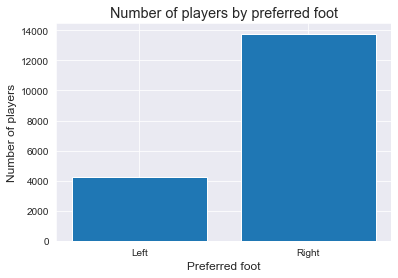

In [12]:
with sns.axes_style('darkgrid'):
    plt.figure()
    plt.bar(foot_count.preferred_foot, foot_count.number)
    plt.title('Number of players by preferred foot')
    plt.xlabel('Preferred foot')
    plt.ylabel('Number of players')
    plt.show()

### Players' age

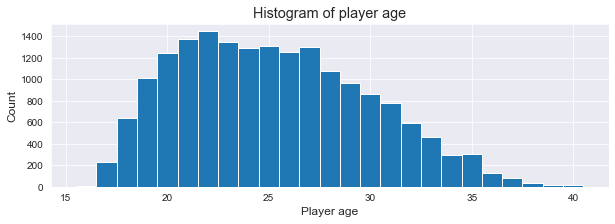

In [13]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,3))
    plt.hist(data.age, bins=np.arange(15.5, 41.5, 1))
    plt.xlabel('Player age')
    plt.ylabel('Count')
    plt.title('Histogram of player age')
    plt.show()

### Players' height

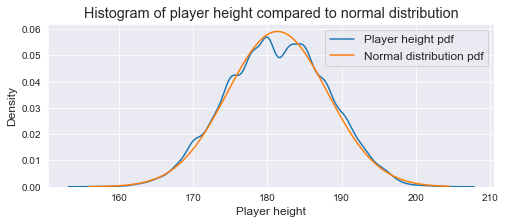

In [14]:
with sns.axes_style('darkgrid'):
    x = np.arange(min(data.height_cm), max(data.height_cm), 0.5)
    plt.figure(figsize=(8,3))
    sns.kdeplot(data.height_cm, label='Player height pdf')
    plt.plot(x, norm.pdf(x, loc=data.height_cm.mean(), scale=np.std(data.height_cm)), label='Normal distribution pdf')
    plt.xlabel('Player height')
    plt.title('Histogram of player height compared to normal distribution')
    plt.legend()
    plt.show()

### Players' weight

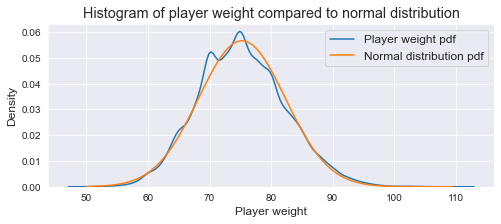

In [15]:
with sns.axes_style('darkgrid'):
    x = np.arange(min(data.weight_kg), max(data.weight_kg), 0.5)
    plt.figure(figsize=(8,3))
    sns.kdeplot(data.weight_kg, label='Player weight pdf')
    plt.plot(x, norm.pdf(x, loc=data.weight_kg.mean(), scale=np.std(data.weight_kg)), label='Normal distribution pdf')
    plt.xlabel('Player weight')
    plt.title('Histogram of player weight compared to normal distribution')
    plt.legend()
    plt.show()

**Conclusion**

As expected, the majority of players are right-footed. The most players present in the data are between 19 and 27 years old, which seems reasonable, because this is the age when footballers are the most efficient. Players' height and weight at first glance are close to bell-curved, but it cannot be assumed they come from normal distribution.

## 2) Check whether player's weight depends of his height

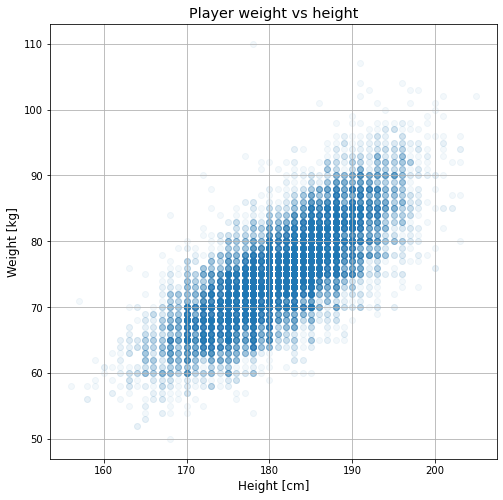

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(data.height_cm, data.weight_kg, alpha=0.05)
plt.title('Player weight vs height')
plt.xlabel('Height [cm]')
plt.ylabel('Weight [kg]')
plt.grid('on')
plt.show()

We can see that there is some kind of relationship between these variables. Let's check Pearson correlation coefficient then.

In [17]:
data.filter(['height_cm', 'weight_kg']).corr().round(3)

height_cm  weight_kg
height_cm      1.000      0.768
weight_kg      0.768      1.000

There is a significant positive correlation between chosen variables.

**Conclusion** 

There is a significant relationship between player's weight and height.

## 3) Compare overall player rating between nationalities

Top 10 most numerous nationalities were listed below.

In [18]:
data.nationality.value_counts().head(10)

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        590
Japan           453
Netherlands     415
Name: nationality, dtype: int64

In [19]:
top_10_nationalities = list(data.nationality.value_counts().head(10).index)
data_top_10          = data[data.nationality.isin(top_10_nationalities)]
order_top_10         = list(data_top_10.groupby('nationality').overall.median().sort_values(ascending=False).index)

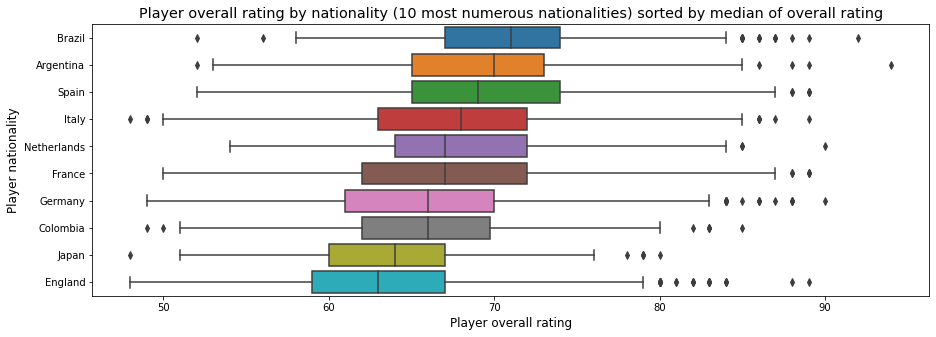

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data_top_10.overall, 
            y=data_top_10.nationality, 
            order=order_top_10)
plt.xlabel('Player overall rating')
plt.ylabel('Player nationality')
plt.title('Player overall rating by nationality (10 most numerous nationalities) sorted by median of overall rating')
plt.show()

**Conclusion** 

Taking into account only 10 most numerous nationalities, overall rating of players is generally highest in Brazil, Argentina and Spain. The results seem reasonable, because these countries have been lately succeeding in international football.

## 4) Is number 7 really so lucky compared to 'unlucky 13'?

We can check whether player overall rating varies between these 2 selected jersey numbers. A few chosen nationalities will be taken into account.

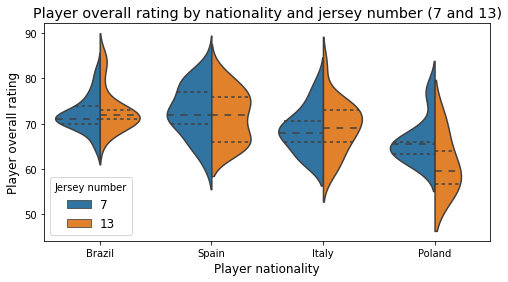

In [21]:
plt.figure(figsize=(8,4))
sns.violinplot(x='nationality', 
               y='overall', 
               hue='team_jersey_number',
               data=data[data.team_jersey_number.isin([7, 13]) & data.nationality.isin(['Poland', 'Spain', 'Italy', 'Brazil'])],
               split=True,
               inner='quartile')
plt.xlabel('Player nationality')
plt.ylabel('Player overall rating')
plt.title('Player overall rating by nationality and jersey number (7 and 13)')
plt.legend(title='Jersey number', loc=3)
plt.show()

Violit plot (fancy ^_^) can be described as a combination of boxplot and density estimate. There are shown not only quantile lines, but also kernel density estimate for each subcategory.

**Conclusion** 

In Poland very good players tend to prefer number 7 to 13, while players with 13 have generally much lower overall. On the other hand, in Spain we can see much smaller difference. In Brazil number 13 doesn't seem to be unlucky, because there are some very good players (with overall around 85) who choose it.

### 5) Is there some kind of correlation between features?

There will be a correlation map plotted to check whether the features are correlated.

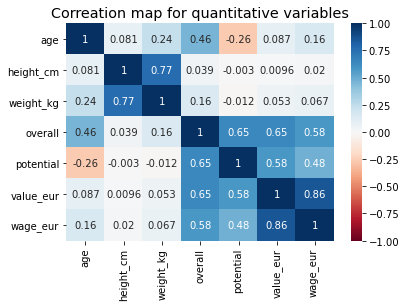

In [22]:
plt.figure()
fig = sns.heatmap(
    data.drop(['sofifa_id', 'team_jersey_number'], axis=1).corr(), 
    cmap='RdBu',
    vmin=-1, 
    vmax=1,
    annot=True
)
plt.title('Correation map for quantitative variables')
plt.show()

**Conclusion**

There are variables with obvious positive correlation, like 
- height and weigth (0.77) - the taller a player is the heavier he is,
- value and wage (0.86) - the more valuable player the more he earns,
- potential and overall (0.65) - potential is always near overall rating,
- overall and value (0.65) - the better the player the more he is worth.

There is also one interesting (small, but worth noticing) negative correlation between potential and age. It might mean that the older a player is the less potential he has.

# Summary

Data analysis is not an easy task. There are many things to remember about and variety of tools to use. Chosen data was very interesting to analyse, especially when some not obvious remarks were made. There are still many questions that may be asked regarding this dataset.